<a href="https://colab.research.google.com/github/GOPIKAV77/Python/blob/main/Standardized_residuals_qqplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Residual Plot

<Axes: xlabel='Student_Population', ylabel='Sales'>

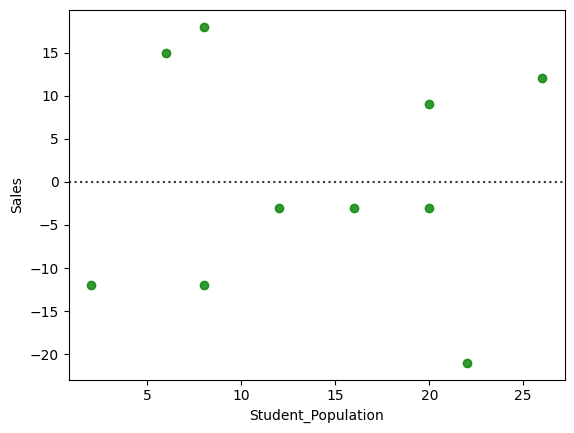

In [2]:
import seaborn as sns
import pandas as pd
df = pd.read_excel("icecream.xlsx")
sns.residplot(x=df["Student_Population"],y=df["Sales"],data=df,color='g')

In [3]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt


In [4]:
reg = ols(formula= 'Sales~Student_Population',data = df)
fit = reg.fit()
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Mon, 17 Feb 2025   Prob (F-statistic):           2.55e-05
Time:                        15:26:39   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


Anova is used to statistically compare means of different groups to find out if their is significant difference between them.

In [5]:
print(anova_lm(fit))

                     df   sum_sq   mean_sq          F    PR(>F)
Student_Population  1.0  14200.0  14200.00  74.248366  0.000025
Residual            8.0   1530.0    191.25        NaN       NaN


Standardized residuals against the independant variable


In [7]:
influence = fit.get_influence()
resid_student = influence.resid_studentized_external

In [8]:
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

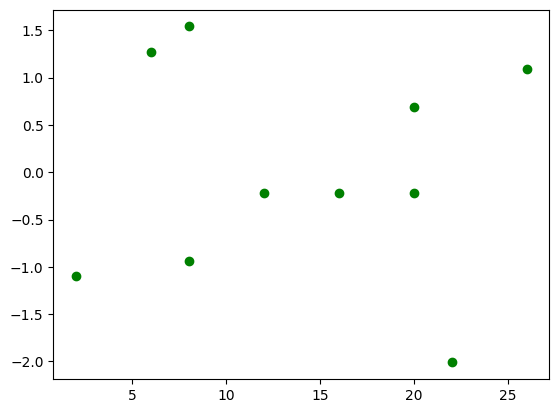

In [9]:
plt.figure()
plt.scatter(df["Student_Population"],resid_student,color='green')

qqplot- is a graph that compare two sets of data by plotting their quantities against each other


<function matplotlib.pyplot.show(close=None, block=None)>

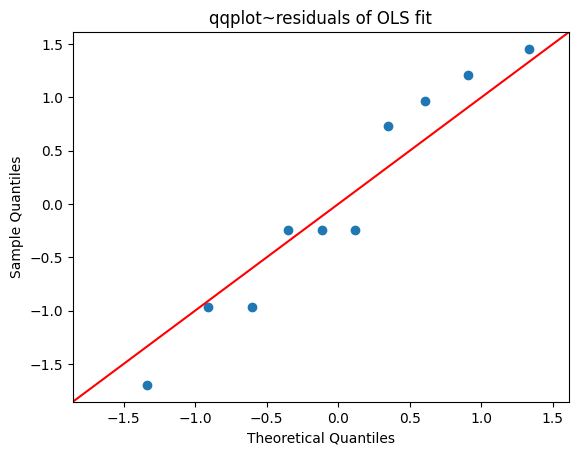

In [11]:
from scipy import stats
import statsmodels.api as sm
res = fit.resid
probplot = sm.ProbPlot(res,stats.norm,fit=True)
fig = probplot.qqplot(line='45')
h = plt.title('qqplot~residuals of OLS fit')
plt.show